In [3]:
import  warnings

warnings.filterwarnings('ignore')


In [6]:
import pandas as pd

df = pd.read_csv('../dataset/house_train.csv')
print(df['price'][0:10:2])

name_age = df[['price', 'sqft_living']]



0    221900.0
2    180000.0
4    510000.0
6    257500.0
8    229500.0
Name: price, dtype: float64


In [39]:
# 分類問題
#　予測と正解

#0陰性、1陽性
import numpy as np
y2_pred = np.array(np.random.randint(2,size=10))
y2_ans  = np.array(np.random.randint(2,size=10))

# Accuracy, Precision, Recall

accuracy = 0.0
precision_count = 0.0
preision_total = 0
recall_count = 0.0
recall_total = 0

for i in range(y2_pred.size):
    #Accuracy をもとめる
    if y2_ans[i] == y2_pred[i]:
        accuracy = accuracy + (1/y2_pred.size)
    #Precision をもとめる
    if y2_pred[i]== 1 :
        precision_total += 1
        if y2_ans[i] == 1 :
            precision_count += 1 
            
    #Recall をもとめる
    if y2_ans[i] == 1:
        recall_total += 1
        if y2_pred[i]==1:
            recall_count += 1
            
precision = precision_count/precision_total
recall = recall_count/recall_total

#f値を求める
f_value = 2*precision*recall/(precision+recall)

print('accuracy is  {:.3f}'.format(accuracy))
print('precision is {:.3f}'.format(precision))
print('recall is {:.3f}'.format(recall))
print('F value is {:.3f}'.format(f_value))


accuracy is  0.600
precision is 0.025
recall is 0.333
F value is 0.046
F value is 50.000


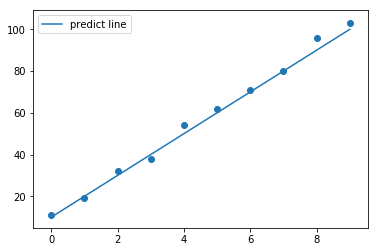

score 決定係数は0.990788
RMSEの値は2.756810
MAEの値は2.200000
[73 88 49 81 76 96 98 47 54 44]


In [17]:
#回帰問題
#決定係数
#RMSE　root mean squared error  MAE

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error #二乗誤差
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score #決定係数

#回帰モデルによって予測された値を格納した配列
y_pred = 10*np.arange(1,11)
#訓練データには使っていないテスト用の出た
y_ans =np.array([11,19,32,38,54,62,71,80,96,103])
y_ans1 = np.random.randint(0,100,size = 10)
r2 = r2_score(y_pred,y_ans)
rmse = np.sqrt(mean_squared_error(y_pred, y_ans))

mae = mean_absolute_error(y_ans, y_pred)


plt.plot(range(10), y_pred, label ='predict line')
plt.scatter(range(10), y_ans)
plt.legend()
plt.show()

print('score 決定係数は{:3f}'.format(r2))
print("RMSEの値は{:3f}".format(rmse))
print('MAEの値は{:3f}'.format(mae))
print(y_ans1)

In [18]:
#交差検証法　cross variation
分類問題
    PassengerId: 乗客のID
    Survived: 生存(1)、死亡(0)
    Pclass: 乗客の階級
    Name: 乗客の名前
    Sex: 性別
    Age: 年齢
    SibSp: タイタニック号に乗っていた兄弟、姉妹、義兄弟、義姉妹、夫、妻の数（自分を除く）　sibling
    Parch: タイタニック号に乗っていた母親、父親、息子、娘の数 parents
    Ticket: チケットナンバー
    Fare: 乗船料金
    Cabin: キャビン番号
    Embarked: 乗船場

        

欠損値の処理方法は大きく分けて以下の3つ

    欠損値を含む行を削除
    欠損値を列の平均値や中央値で補完　ほかん
    似た行や自身の行の他の列の値から推測し、その推定値で補完

        
        

IndentationError: unexpected indent (<ipython-input-18-4a197c4b48a7>, line 3)

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

csv_titanic = pd.read_csv('../dataset/titanic_train.csv')
csv_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [141]:
csv_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            153
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          575
Embarked         1
dtype: int64

In [20]:
#前処理


print('the data file has {:d} rows, {:d} columns '.format(csv_titanic.shape[0], csv_titanic.shape[1]))
# Cabin と言う列名を削除
csv_titanic = csv_titanic.iloc[:,csv_titanic.columns!='Cabin']
#　欠損を含む行を削除
csv_titanic = csv_titanic.dropna()
print('the data file has {:d} rows, {:d} columns '.format(csv_titanic.shape[0], csv_titanic.shape[1]))
print(csv_titanic.isnull().sum())

the data file has 749 rows, 12 columns 
the data file has 595 rows, 11 columns 
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [21]:
#　男性を0　,　女性を1とした.
csv_titanic = csv_titanic.replace("male",0).replace("female",1)
#乗船場の文字列を数値化した.
Embarked_dummies = pd.get_dummies(csv_titanic['Embarked'])
print('ダミー変数化したときに、Embarkedは{}行{}列のデータになる'
      .format(Embarked_dummies.shape[0], Embarked_dummies.shape[1]))
del(csv_titanic['Embarked'])
csv_titanic["S"]= Embarked_dummies['S']
csv_titanic['Q']=Embarked_dummies['Q']
csv_titanic['C']=Embarked_dummies['C']
Ticket_dummies = pd.get_dummies(csv_titanic['Ticket'])
print("ダミー変数化したときに, Ticketは{}行{}列のデータになります."
      .format(Ticket_dummies.shape[0], Ticket_dummies.shape[1]))
#too many categories
del(csv_titanic['Ticket'])
# Embarkedと言う列を削除


ダミー変数化したときに、Embarkedは595行3列のデータになる
ダミー変数化したときに, Ticketは595行464列のデータになります.


In [22]:
csv_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,S,Q,C
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,1,0,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,1,0,0


In [13]:
csv_titanic.corr()
# + y = x  - y= -x


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.012086,-0.080656,0.095611,-0.086684,-0.024240,0.067424
Survived,0.012086,1.000000,-0.323211,-0.083360,-0.029529,0.058580,0.244779
Pclass,-0.080656,-0.323211,1.000000,-0.370614,0.081088,0.018575,-0.555721
Age,0.095611,-0.083360,-0.370614,1.000000,-0.315870,-0.195315,0.076212
SibSp,-0.086684,-0.029529,0.081088,-0.315870,1.000000,0.402662,0.146391
Parch,-0.024240,0.058580,0.018575,-0.195315,0.402662,1.000000,0.206829
Fare,0.067424,0.244779,-0.555721,0.076212,0.146391,0.206829,1.000000


In [23]:
#select the algorithm

# svm and Random forest
''''ランダムフォレストとSVMどちらがよいか..?
低次元でデータが少なければSVM、高次元でデータが多ければランダムフォレストを用いるとよいといわれている.
ランダムフォレストはハイパーパラメータの調節が比較的楽.
SVMは説明変数ごとの単位が違う場合などには正規化が必要であるため、作業量が増える.
この例題ではランダムフォレストを使う.'''

#決定木　decision tree

#random forest の実装（じっそう）
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


#説明変数と目的変数
X_titanic = csv_titanic[['Age','Pclass','Sex','SibSp','Parch','Fare','S','Q', 'C']]
Y_titanic = csv_titanic['Survived']
#実行ごとに結果が変わらないように乱数を指定 set the random state for stable results
clf = RandomForestClassifier(random_state=0)
#交差検証を用いてモデルを評価。分割は3  (method,learning variables,test variables,(cv))
scores= cross_val_score(clf, X_titanic, Y_titanic, cv= 3)
print('3回分のaccuracyは{}で、平均値{:3f}'.format(scores, scores.mean()))


3回分のaccuracyは[0.72864322 0.80808081 0.77777778]で、平均値0.771501


In [24]:
#ハイパーパラメター n_estimatiors のmax_depth の最適化　　
#grid search cv = cross variation
from sklearn.model_selection import GridSearchCV
params = {'n_estimators' :[10, 20, 30], 'max_depth':[1, 5, 10], 'random_state':[0]}
#n_jobs =-1すると、複数のコアを使って計算してくれる  all combinations
cv_titanic = GridSearchCV(clf,  params, cv = 3, n_jobs=-1)
cv_titanic.fit(X_titanic, Y_titanic)
print('finished')

finished


In [32]:
#hyperparameters ごとの結果を出力
#print(cv_titanic.cv_results_) 


In [26]:
#見やすくなる手法
result = pd.DataFrame(cv_titanic.cv_results_)
result = result.drop('params', axis=1)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,param_random_state,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.032429,0.002862,0.005398,0.000764,1,10,0,0.653266,0.676768,0.702020,0.677311,0.019916,9
1,0.060761,0.002961,0.007005,0.001360,1,20,0,0.653266,0.813131,0.727273,0.731092,0.065348,7
2,0.078155,0.005505,0.006491,0.000638,1,30,0,0.633166,0.813131,0.727273,0.724370,0.073530,8
3,0.026555,0.000808,0.004155,0.000305,5,10,0,0.738693,0.848485,0.797980,0.794958,0.044892,1
4,0.061216,0.003484,0.005388,0.000274,5,20,0,0.738693,0.843434,0.803030,0.794958,0.043156,1


In [27]:

#get best parameters set 
cv_titanic.best_params_

{'max_depth': 5, 'n_estimators': 10, 'random_state': 0}

In [28]:
#予測データを用いた精度評価
test_titanic = pd.read_csv('../dataset/titanic_test.csv')
print(test_titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             24
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          112
Embarked         1
dtype: int64


In [29]:
#欠損値を平均年齢で補完
test_titanic = pd.read_csv('../dataset/titanic_test.csv')
test_titanic['Age'] = test_titanic['Age'].replace(pd.np.nan, csv_titanic['Age'].mean())

#男性を0、　女性を1とした
test_titanic = test_titanic.replace('male',0).replace('female',1)
#乗船場をダミー変数化した
test_Embarked_dummies = pd.get_dummies(test_titanic['Embarked'])
del(test_titanic['Embarked'])
test_titanic['S']= test_Embarked_dummies['S']
test_titanic['Q']= test_Embarked_dummies['Q']
test_titanic['C']= test_Embarked_dummies['C']

X_test_titanic = test_titanic[['Age','Pclass','Sex', 'SibSp', 'Parch', 'Fare', 'S','Q','C']]
#自動的に一番accuracyの高いハイパーパラメーターが採用される  with grid search 
pred = cv_titanic.predict(X_test_titanic) 






In [30]:
from sklearn.metrics import accuracy_score
#see how accurate prediction was
accuracy = accuracy_score(pred, test_titanic['Survived'])

print('テストデータに対してのaccuracyは{}です'.format(accuracy))



テストデータに対してのaccuracyは0.8591549295774648です


In [28]:
#回帰モデル
import pandas as pd 

import warnings
warnings.filterwarnings('ignore')

In [29]:
#ead the data frame 
csv_house = pd.read_csv('../dataset/house_train.csv')
# no Nan values
print(csv_house.isnull().sum())

#check the data , change renovation year to a 0~10pt scale
csv_house.head()


id              0
price           0
bedrooms        0
bathrooms       0
sqft_living     0
sqft_lot        0
floors          0
waterfront      0
view            0
condition       0
grade           0
yr_built        0
yr_renovated    0
dtype: int64


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1955,0
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,1951,1991
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,1933,0
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1965,0
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1987,0


In [75]:
csv_house[['price','sqft_living']][0:50:2]

,price,sqft_living
0,221900.0,1180
2,180000.0,770
4,510000.0,1680
6,257500.0,1715
8,229500.0,1780
10,662500.0,3560
12,310000.0,1430
14,530000.0,1810
16,395000.0,1890
18,189000.0,1200


In [76]:
# correlation 相関値を調べる

csv_house.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated
id,1.000000,-0.012332,0.000952,0.003562,-0.012617,-0.138381,0.009266,-0.006426,0.017603,-0.019015,0.005838,0.017523,-0.022571
price,-0.012332,1.000000,0.308177,0.521531,0.702182,0.093611,0.280391,0.283310,0.395414,0.044744,0.659890,0.036283,0.138451
bedrooms,0.000952,0.308177,1.000000,0.535959,0.577499,0.035516,0.211342,-0.003320,0.088306,0.027984,0.364837,0.170397,0.022582
bathrooms,0.003562,0.521531,0.535959,1.000000,0.760312,0.098684,0.503834,0.081672,0.203593,-0.095081,0.657630,0.485572,0.068160
sqft_living,-0.012617,0.702182,0.577499,0.760312,1.000000,0.179119,0.398605,0.116773,0.293427,-0.048763,0.766212,0.325131,0.067106
sqft_lot,-0.138381,0.093611,0.035516,0.098684,0.179119,1.000000,0.025973,0.023571,0.073080,-0.019882,0.130294,0.090902,0.006365
floors,0.009266,0.280391,0.211342,0.503834,0.398605,0.025973,1.000000,0.038873,0.058216,-0.220247,0.462967,0.418070,0.036357
waterfront,-0.006426,0.283310,-0.003320,0.081672,0.116773,0.023571,0.038873,1.000000,0.391415,0.018798,0.093658,-0.016387,0.089923
view,0.017603,0.395414,0.088306,0.203593,0.293427,0.073080,0.058216,0.391415,1.000000,0.041577,0.260063,-0.034358,0.101307
condition,-0.019015,0.044744,0.027984,-0.095081,-0.048763,-0.019882,-0.220247,0.018798,0.041577,1.000000,-0.127201,-0.317196,-0.075201


In [77]:
del(csv_house['id'])

In [78]:
# check the value distribution for a variable
csv_house['yr_renovated'].value_counts()

0       14326
2014       71
2003       30
2005       28
2013       27
        ...  
1954        1
1959        1
1934        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

In [11]:
max_renovated = np.max(csv_house['yr_renovated'])
max_renovated

2015

''' 
yr_renovatedを以下の条件を満たす値に変更する.

    5年以内の場合は10
    5*k年以内の場合には10-k
    リフォームなしの場合には0


'''
#最新年数
max_renovated = np.max(csv_house['yr_renovated'])

z

In [12]:
for i in range(1,11):
    # get 10 categories  with lenght  5*i
    renovated_value = max_renovated-5*i
    #to each category give value 10-i
    csv_house['yr_renovated'][csv_house['yr_renovated']> renovated_value] = 10-i
    print(renovated_value)
    
csv_house['yr_renovated'][csv_house['yr_renovated'] > 1900] = 0





2010
2005
2000
1995
1990
1985
1980
1975
1970
1965


In [13]:
# rescaled values 
csv_house['yr_renovated'].value_counts()

0    14383
9      128
7      107
8       80
5       69
6       68
4       66
3       55
2       30
1       14
Name: yr_renovated, dtype: int64

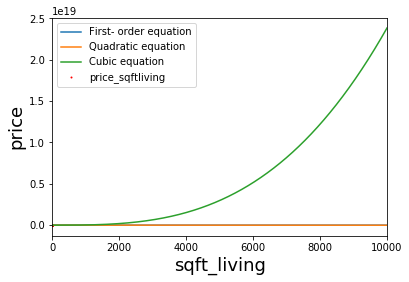

In [30]:
#線形回帰か非線回帰かを選択

#多項式回帰モデルは過学習を起きやすい
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures

# 3 regression
rgs1 = Lasso()
rgs2 = Lasso()
rgs3 = Lasso()
#説明変数を格納 each value gets its own 1*1 array 　ＳＱＦＴLIVING

X_test = csv_house.iloc[:,3].values.reshape(-1,1)
#目的変数　PRICE
Y_test = csv_house.iloc[:,0]

rgs1.fit(X_test,Y_test)
#put it into a column , y will go back to a 1d vector
y =rgs1.predict(np.arange(0,10000).reshape(10000,1))

#2次元の多項式回帰モデル作成
quadratic_test = PolynomialFeatures(degree=2)
X_quadratic_test = quadratic_test.fit_transform(X_test)
rgs2.fit(X_quadratic_test, Y_test)
#係数を取得
a1, a2 = rgs2.coef_[1:]
#切片を取得
b = rgs2.intercept_

X= np.arange(10000)
Y_quadratic = a1*X + a2*X**2 + b

#3次元の多項式回帰モデルの作成
cubic_test = PolynomialFeatures(degree=3)
X_cubic_test = cubic_test.fit_transform(X_test)
rgs3.fit(X_cubic_test, Y_test)
#係数を取得
a1, a2, a3 = rgs3.coef_[1:]
#切片を取得
b = rgs3.intercept_
X = np.arange(10000)
Y_cubic = a1*X+ a2*X**2 + a3*X**3 + b

#plot the data

plt.plot(y,label = 'First- order equation')
plt.plot(Y_quadratic, label = 'Quadratic equation')
plt.plot(Y_cubic, label= 'Cubic equation')
plt.scatter(X_test, Y_test, s=1, c="r", label= 'price_sqftliving')
plt.xlabel('sqft_living', size = 18)
plt.ylabel('price', size = 18)
plt.xlim(X.min(),X.max())
plt.legend()
plt.show()
plt.clf()

In [31]:
#線形回帰
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

def normalize(x):
    xmean =  x.mean()
    xstd  =  np.std(x)
    print('平均{},標準差は{}です'.format(xmean, xstd))
    zscore = (x - xmean)/xstd
    return zscore
#set the hyperparameters
rgs = Lasso(normalize = True)
#説明変数を格納する　勝手に正規化してくれる
X_house = csv_house.iloc[:,1:]
#目的変数を格納
Y_house = normalize(csv_house.iloc[:,0])
# set the parameters 
params = {'alpha': [0, 0.0001, 0.001, 0.01], 'random_state':[0]}
# look for the best parameters set　　
#　algorithm chooses the highest value, hence for mse values  multiply by -1 to get the same trend

gs_house = GridSearchCV(rgs, params, cv=20, n_jobs =-1, scoring='neg_mean_squared_error' )
# fit
gs_house.fit(X_house, Y_house)
print('計算完了')



平均4554232455.3980665,標準差は2863788368.837442です
計算完了


In [18]:
gs_house.cv_results_

{'mean_fit_time': array([2.95667033, 0.13403159, 0.10874944, 0.07687012]),
 'std_fit_time': array([0.2087611 , 0.02445199, 0.01512698, 0.01483473]),
 'mean_score_time': array([0.00250117, 0.00300077, 0.00504497, 0.00487409]),
 'std_score_time': array([0.00300063, 0.00297533, 0.00499181, 0.00935045]),
 'param_alpha': masked_array(data=[0, 0.0001, 0.001, 0.01],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_random_state': masked_array(data=[0, 0, 0, 0],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0, 'random_state': 0},
  {'alpha': 0.0001, 'random_state': 0},
  {'alpha': 0.001, 'random_state': 0},
  {'alpha': 0.01, 'random_state': 0}],
 'split0_test_score': array([-0.3156082 , -0.31196537, -0.36593591, -0.92801374]),
 'split1_test_score': array([-0.50691827, -0.51413918, -0.62991457, -1.39517021]),
 'split2_test_score': array([-0.28130773, -0.2801448

In [19]:
#見やすくなる手法
result = pd.DataFrame(gs_house.cv_results_)
result = result.drop('params', axis=1)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_random_state,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,2.956670,0.208761,0.002501,0.003001,0,0,-0.315608,-0.506918,-0.281308,-0.339702,...,-0.268405,-0.227366,-0.359093,-0.328407,-0.279809,-0.384216,-0.243484,-0.347557,0.104351,1
1,0.134032,0.024452,0.003001,0.002975,0.0001,0,-0.311965,-0.514139,-0.280145,-0.344861,...,-0.271151,-0.223234,-0.362334,-0.329845,-0.279176,-0.382669,-0.240848,-0.349378,0.108515,2
2,0.108749,0.015127,0.005045,0.004992,0.001,0,-0.365936,-0.629915,-0.350917,-0.441837,...,-0.334715,-0.245169,-0.434996,-0.382413,-0.315899,-0.451393,-0.284450,-0.419086,0.142198,3
3,0.076870,0.014835,0.004874,0.009350,0.01,0,-0.928014,-1.395170,-0.875656,-1.103163,...,-0.766167,-0.638940,-1.114261,-0.878992,-0.823292,-1.070054,-0.803857,-1.000178,0.294515,4


In [20]:
print('the best hyperparameter is{} '.format(gs_house.best_params_))
print(' Its standard deviation is {: 3f}'.format(gs_house.cv_results_['std_test_score'][gs_house.best_index_]))
print('The regression coefficient is {}'.format(gs_house.best_estimator_.coef_))
print('Intercept at {}'.format(gs_house.best_estimator_.intercept_))


the best hyperparameter is{'alpha': 0, 'random_state': 0} 
 Its standard deviation is  0.104351
The regression coefficient is [-1.10141552e-01  1.12121684e-01  4.96925995e-04 -5.86713805e-07
  3.62378849e-02  1.71673667e+00  1.10454772e-01  5.34310034e-02
  3.27169972e-01 -1.01610548e-02  2.04094483e-02]
Intercept at 16.354713509001126


In [16]:
#非線形回帰モデル実装例
from sklearn.preprocessing import PolynomialFeatures 
#2乗したデータまでを格納
quadratic = PolynomialFeatures(degree = 2)
X_quadratic_house = quadratic.fit_transform(X_house)


In [17]:
#parameters for quadratic regression 
params4 = {'alpha':[0,  0.00001, 0.0001, 0.001 ], 'random_state':[0] }
gs_house2 = GridSearchCV(rgs, params4, cv = 10, n_jobs=-1, scoring='neg_mean_squared_error')
gs_house2.fit(X_quadratic_house, Y_house)
gs_house2.cv_results_

{'mean_fit_time': array([19.33856854, 14.36982236,  3.25954638,  4.24515588]),
 'std_fit_time': array([0.97548619, 1.21270564, 0.89601489, 2.69844369]),
 'mean_score_time': array([0.00837309, 0.00786812, 0.00735941, 0.00521295]),
 'std_score_time': array([0.00319542, 0.00397386, 0.00324279, 0.00269538]),
 'param_alpha': masked_array(data=[0, 1e-05, 0.0001, 0.001],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_random_state': masked_array(data=[0, 0, 0, 0],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 0, 'random_state': 0},
  {'alpha': 1e-05, 'random_state': 0},
  {'alpha': 0.0001, 'random_state': 0},
  {'alpha': 0.001, 'random_state': 0}],
 'split0_test_score': array([-0.98347132, -0.98043059, -0.97607066, -0.99220807]),
 'split1_test_score': array([-1.02110734, -1.00636416, -0.96341196, -0.97333111]),
 'split2_test_score': array([-0.9810808 , -0.9

In [18]:
#Get the mean test score list  for quadratic model
testscore_list = gs_house2.cv_results_['mean_test_score']
param_dict = gs_house2.cv_results_['params']

for score, parameter in zip(testscore_list, param_dict):
    print('score'+str(score),'parameter'+str(parameter['alpha']))

score-0.9792519973137019 parameter0
score-0.9749594044974362 parameter1e-05
score-0.9747156993527252 parameter0.0001
score-0.9946819257940049 parameter0.001


In [19]:
result = pd.DataFrame(gs_house2.cv_results_)
result = result.drop('params', axis=1)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_random_state,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,19.338569,0.975486,0.008373,0.003195,0,0,-0.983471,-1.021107,-0.981081,-0.966955,-0.990937,-0.969607,-0.973839,-0.951529,-0.977969,-0.976023,-0.979252,0.017215,3
1,14.369822,1.212706,0.007868,0.003974,1e-05,0,-0.980431,-1.006364,-0.980922,-0.964804,-0.987787,-0.962110,-0.973001,-0.949747,-0.974540,-0.969889,-0.974959,0.014663,2
2,3.259546,0.896015,0.007359,0.003243,0.0001,0,-0.976071,-0.963412,-0.996495,-0.966904,-0.992989,-0.971779,-0.974752,-0.955749,-0.980018,-0.968988,-0.974716,0.011950,1
3,4.245156,2.698444,0.005213,0.002695,0.001,0,-0.992208,-0.973331,-1.025631,-0.989143,-1.004070,-0.995142,-0.992056,-0.973380,-1.006654,-0.995204,-0.994682,0.014639,4


In [20]:
print('the best hyperparameter is{} '.format(gs_house2.best_params_))
print(' Its standard deviation is {: 3f}'.format(gs_house2.cv_results_['std_test_score'][gs_house2.best_index_]))
print('The regression coefficient is {}'.format(gs_house2.best_estimator_.coef_))
print('Intercept at {}'.format(gs_house2.best_estimator_.intercept_))


the best hyperparameter is{'alpha': 0.0001, 'random_state': 0} 
 Its standard deviation is  0.011950
The regression coefficient is [ 0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -4.60353290e-06  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -8.71590153e-03  0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  4.86812764e-03
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.0000

In [33]:
#テスト用データを用いた精度予測

#データごとに平均値、標準偏差がなかったらまずいので、定数を与える
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
def normalize_test(x):
    #use the mean from  Y_house (price)
    xmean = 532513.975
    xstd = 366713.522
    zscore = (x-xmean)/xstd
    return zscore

csv_house_test = pd.read_csv('../dataset/house_test.csv')
#最新年数は2015
max_renovated = 2015
#yr_renovatedの前処理
for i in range(1,11):
    renovated_value =  max_renovated - 5*i
    csv_house_test['yr_renovated'][csv_house_test['yr_renovated']>renovated_value] = 10-i
    print(renovated_value)
csv_house_test['yr_renovated'][csv_house_test['yr_renovated']>1900] = 0
# Delete id column
del(csv_house_test['id'])
X_house_test = csv_house_test.iloc[:,1:]
#テスト用データの目的変数を格納する
Y_house_ans = normalize_test(csv_house_test.iloc[:,0])
X_house_test

2010
2005
2000
1995
1990
1985
1980
1975
1970
1965


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated
0,2,1.00,710,6300,1.0,0,0,3,6,1942,0
1,3,2.50,2970,11985,1.0,0,0,3,9,1995,0
2,3,2.50,2970,11985,1.0,0,0,3,9,1995,0
3,2,1.00,1000,7664,1.0,0,2,3,7,1939,0
4,3,1.00,1980,8505,1.0,0,0,3,7,1965,0
...,...,...,...,...,...,...,...,...,...,...,...
6608,3,2.50,1530,1131,3.0,0,0,3,8,2009,0
6609,4,2.50,2310,5813,2.0,0,0,3,8,2014,0
6610,2,0.75,1020,1350,2.0,0,0,3,7,2009,0
6611,3,2.50,1600,2388,2.0,0,0,3,8,2004,0


In [34]:
#与えられたデータを2乗に拡張する
quadratic_test = PolynomialFeatures(degree=2)
X_quadratic_house_test = quadratic_test.fit_transform(X_house_test)
#学習済みモデル(線形モデル)を用いて値を予測.
#house_pred1= gs_house.predict(X_house_test)
#学習済みモデル(多項式回帰モデル)を用いて値を予測. 

#house_pred2 = gs_house2.predict(X_quadratic_house_test)


In [37]:
#学習済みモデル(線形モデル)を用いて値を予測.
house_pred1= gs_house.predict(X_house_test)
#学習済みモデル(多項式回帰モデル)を用いて値を予測. 

#house_pred2 = gs_house2.predict(X_quadratic_house_test)

ValueError: shapes (6613,11) and (12,) not aligned: 11 (dim 1) != 12 (dim 0)

In [24]:
from sklearn.metrics import mean_squared_error
# mse of linear regression
MSE_1 = mean_squared_error(house_pred1, Y_house_ans)
MSE_2 = mean_squared_error(house_pred2, Y_house_ans)
print('the MSE of the linear regression is {:3f}, the polynomial regression has a MSE of {:3f}'
      .format(MSE_1, MSE_2))

NameError: name 'house_pred1' is not defined

In [65]:
#実際に可視化、xMEANとＳＴＤを用いて価格に復元する
xmean = 532513.975
xstd = 366713.522
#軸がみにくいので10000で割る
house_pred1_actual = (xstd* house_pred1+xmean)/1e4
house_pred2_actual = (xstd*house_pred2+xmean)/1e4
house_ans_actual = (xstd*Y_house_ans+xmean)/1e4

#線形回帰の予測値と実際値の比較
plt.scatter(house_pred1_actual, house_ans_actual, c='g', s=1)
plt.plot(range(300),range(300), c='r')# y = x
plt.xlabel('predict value (10e4)', size=15)
plt.ylabel('actual value (10e4)', size = 15)
plt.title('Linear Regression')
plt.xlim(-10,400)
plt.tight_layout()
plt.show()

#多項式回帰の予測値と実際の値の比較
plt.scatter(house_pred2_actual, house_ans_actual, c='g',s=1)
plt.plot(range(300),range(300), c = 'r')
plt.xlabel('predict value(10e4)', size = 15)
plt.ylabel('actual value 10e4', size = 15)
plt.title('Polynomial regression')
plt.xlim(-10,400)
plt.tight_layout()
plt.show()

NameError: name 'house_pred1' is not defined